In [5]:
import pandas as pd
import missingno as msno
import seaborn as sns
import re
# import nltk
import random
%matplotlib inline
import matplotlib.pyplot as plt
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk import bigrams, trigrams
# from nltk.probability import FreqDist
# from nltk.stem import PorterStemmer, WordNetLemmatizer

In [7]:
df1 = pd.read_excel('data/DDS9_Data_Extract_with_labels.xlsx')

In [8]:
df2 = pd.read_excel('data/DDS10_Data_Extract_with_labels.xlsx')

In [9]:
df3 = pd.read_excel('data/DDS11_Data_Extract_with_labels.xlsx')

### Common columns across all 3 datasets

In [10]:
df1cols = set(df1.columns)
df2cols = set(df2.columns)
df3cols = set(df3.columns)
common_cols = list(df1cols.intersection(df2cols).intersection(df3cols))
print(len(common_cols))

109


### Concatenated dataset for the common columns

In [16]:
merged_df = df1[common_cols].append(df2[common_cols], ignore_index=True).append(df3[common_cols], ignore_index=True)
merged_df

AttributeError: 'DataFrame' object has no attribute 'append'

In [17]:
dfs = [df1, df2, df3]

In [18]:
demographics = [
    'age - you are...',
    'QNEW3 - What is your employment status?',
    'Q5 - Which category best describes your ethnicity?',
    'Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.',
]
x_labels_demographics = ['Age', 'Employment Status', 'Ethnicity', 'Annual Household Income']

In [19]:
tv_cols = [
    'QNEW24 - Do you ever "binge-watch" television shows, meaning watching three or more episodes of a TV series in one sitting?',
    
]
x_labels_tv = ['Binge Watchers']

In [20]:
streaming_cols = [
    'QNEW28 - How frequently do you use a friend or family member\'s (someone not living in your household) subscription login information  to watch digital content?',
    
]
x_labels_streaming = ['Subscription Sharing']

In [21]:
news_cols = [
    'Q89 - Which of the following is your most frequently used mechanism to get news?',
    
]
x_labels_news = ['News Source']

In [129]:
def create_histogram(df, column, title, x_label, y_label):
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=100, edgecolor='black') #Using edge color to distinguish different columns
    plt.title(title)
    plt.xlabel(x_label)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel(y_label)
    plt.show()

-------------------------------------
DEMOGRAPHIC ANALYSIS OF Dataset 1
-------------------------------------


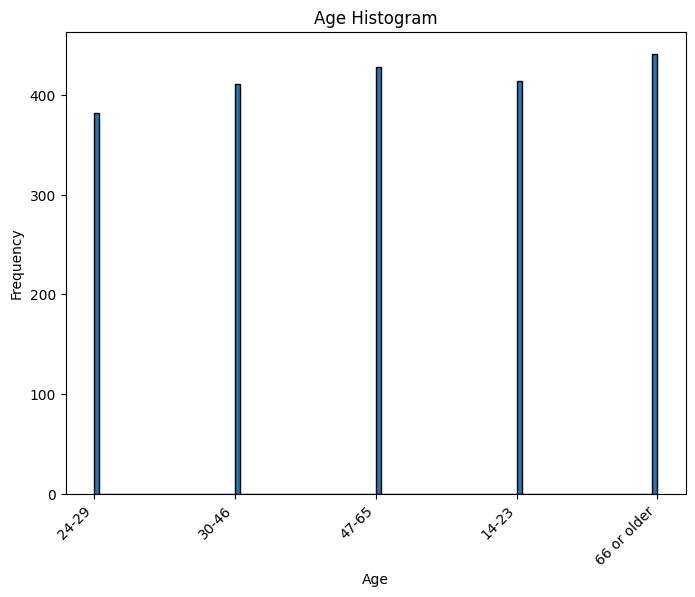

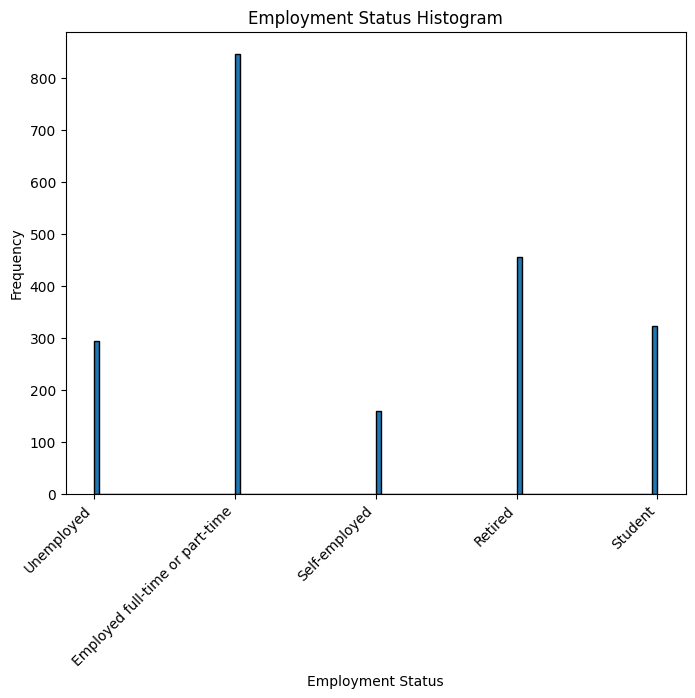

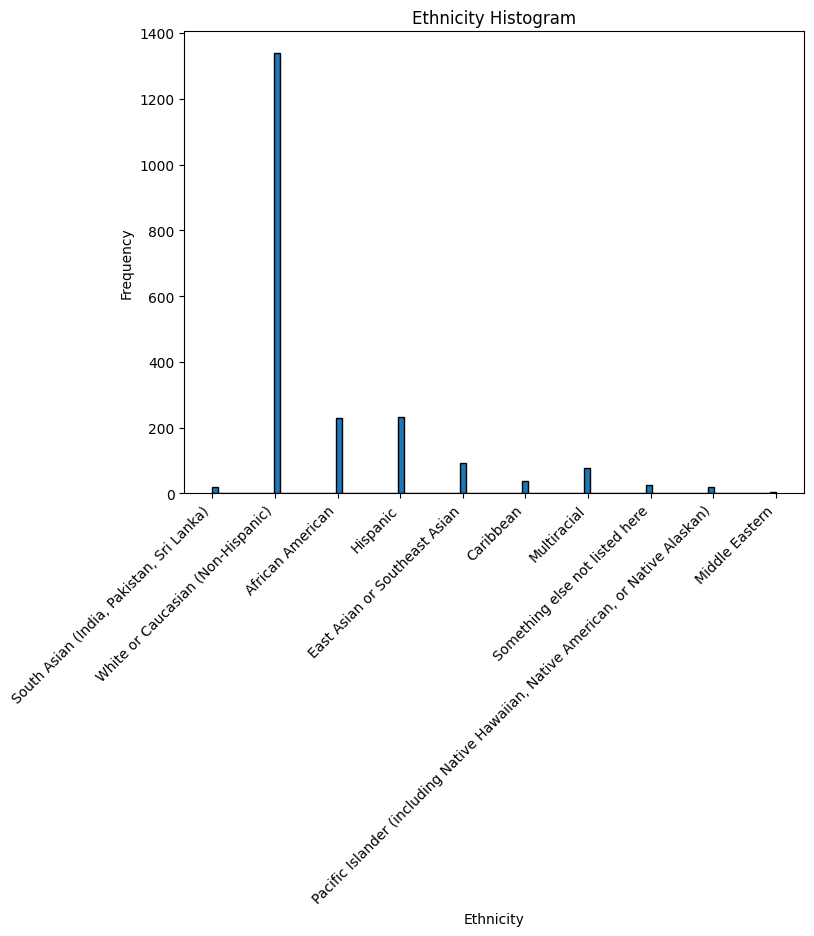

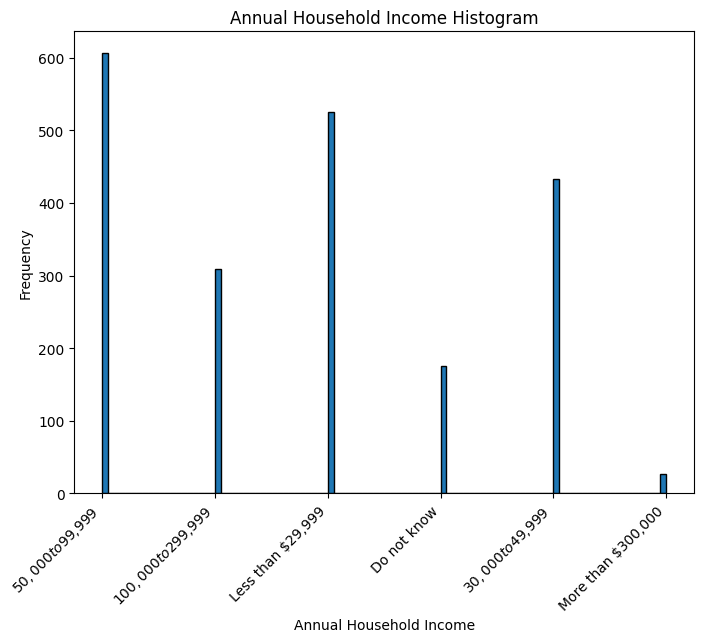

-------------------------------------
DEMOGRAPHIC ANALYSIS OF Dataset 2
-------------------------------------


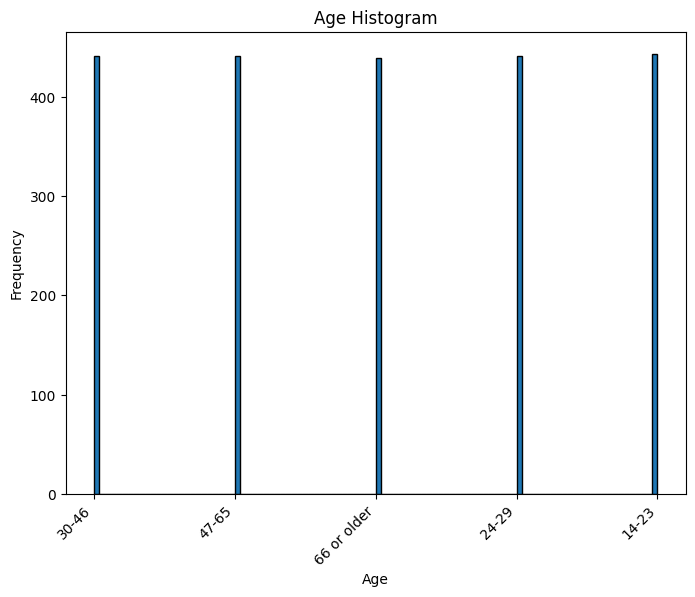

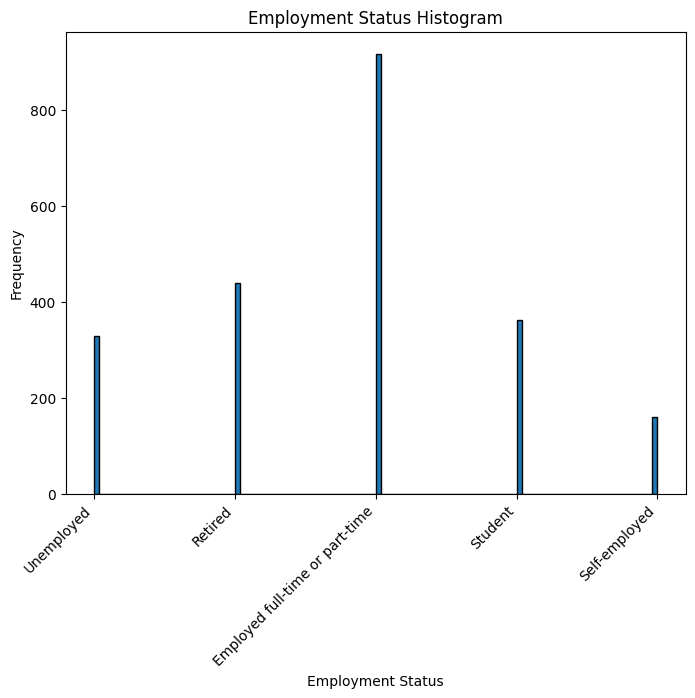

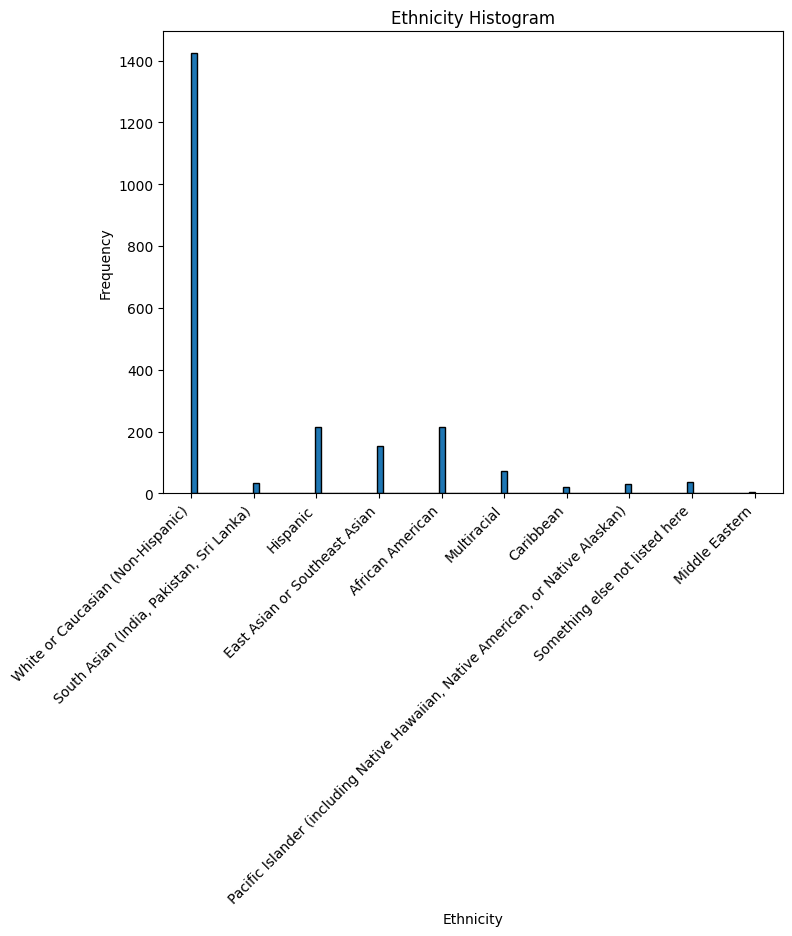

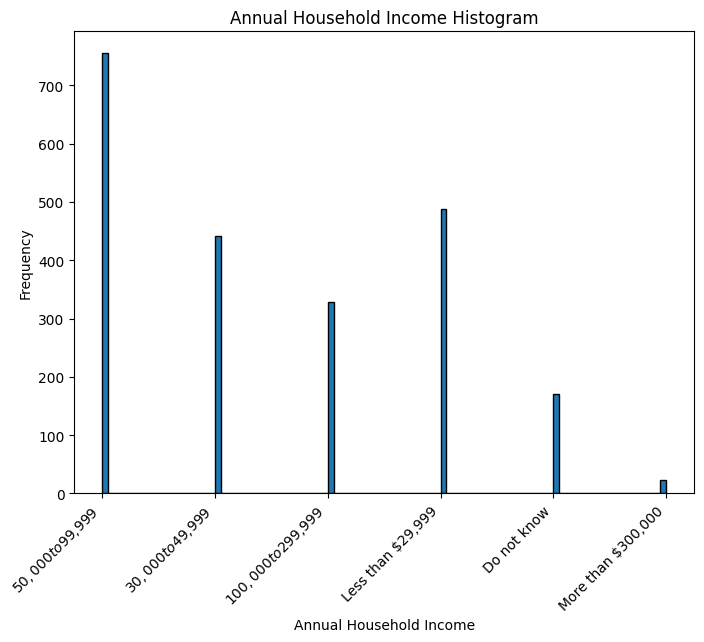

-------------------------------------
DEMOGRAPHIC ANALYSIS OF Dataset 3
-------------------------------------


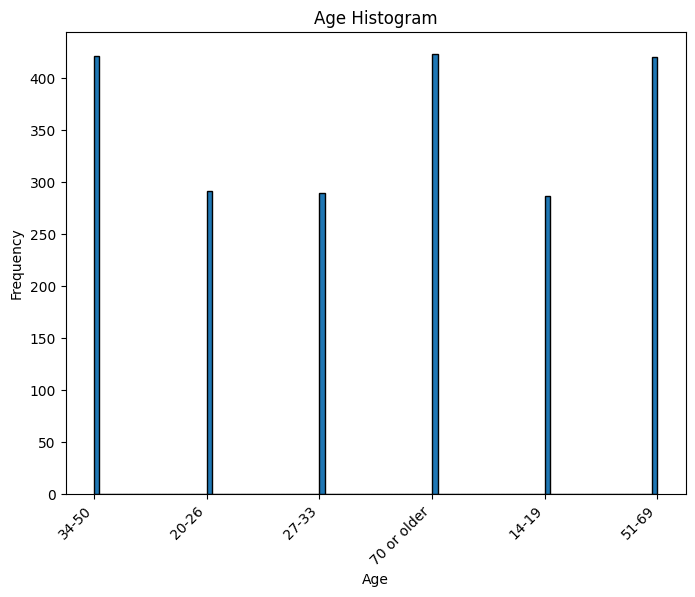

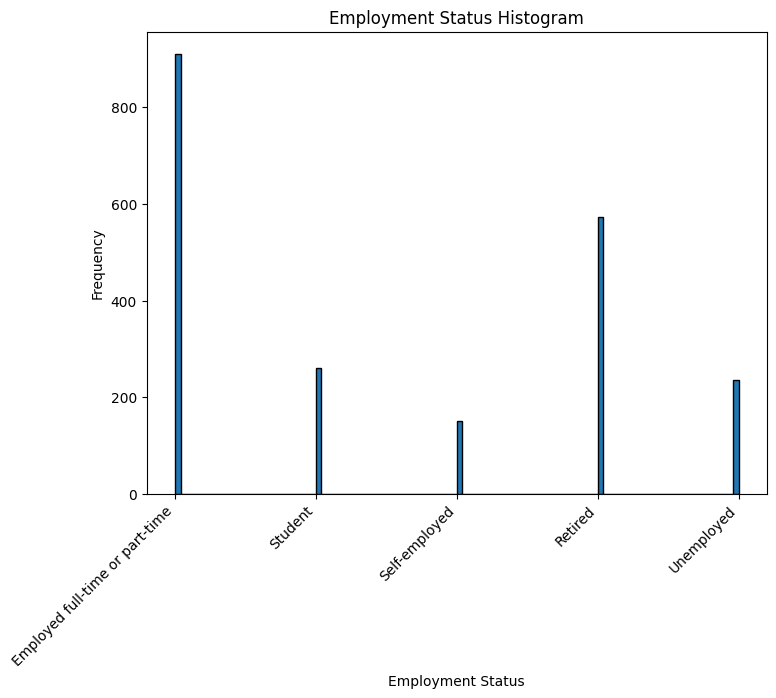

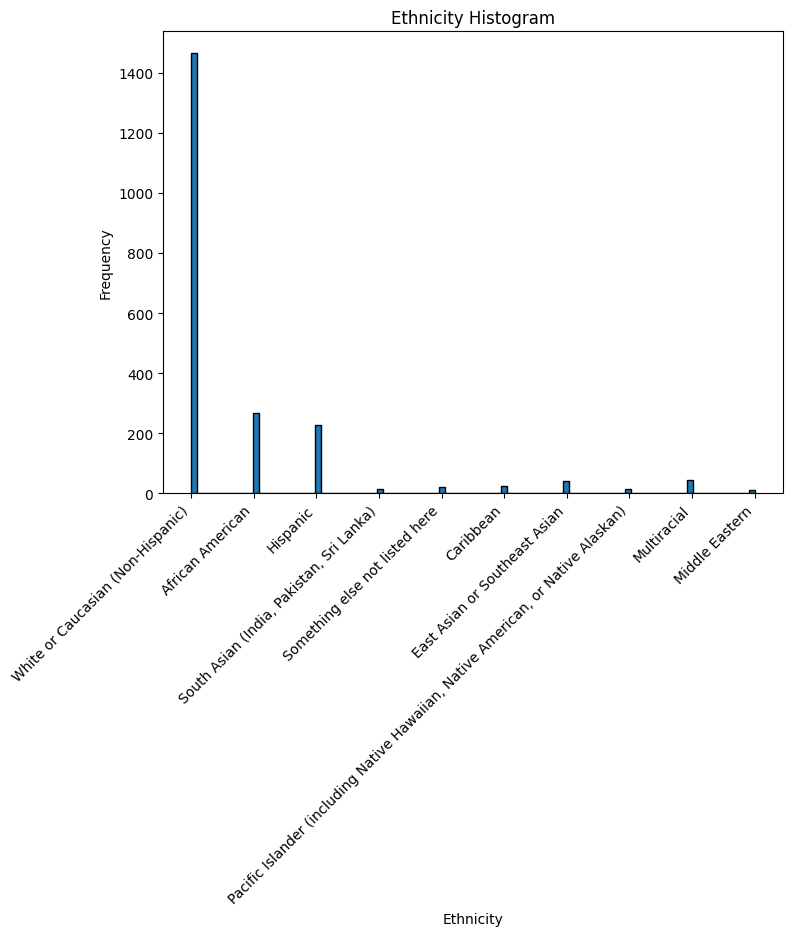

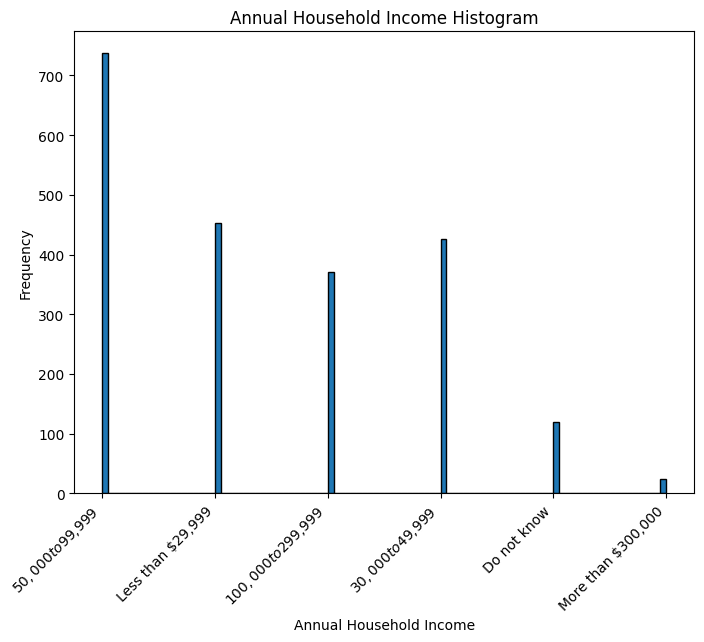

In [130]:
for df_num in range(len(dfs)):
    print("-------------------------------------")
    print("DEMOGRAPHIC ANALYSIS OF Dataset", df_num+1)
    print("-------------------------------------")
    for i in range(len(demographics)):
        create_histogram(dfs[df_num], demographics[i], x_labels_demographics[i] + ' Histogram', x_labels_demographics[i], 'Frequency')

### We can see from the above plots that the demographic distribution of the survey-takers for all the 3 datasets is similar.

-------------------------------------
Binge Watchers ANALYSIS OF Dataset 1
-------------------------------------


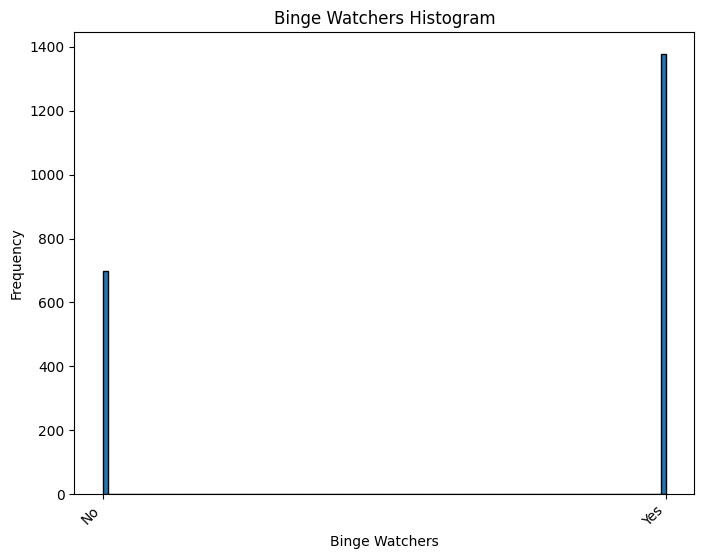

-------------------------------------
Binge Watchers ANALYSIS OF Dataset 2
-------------------------------------


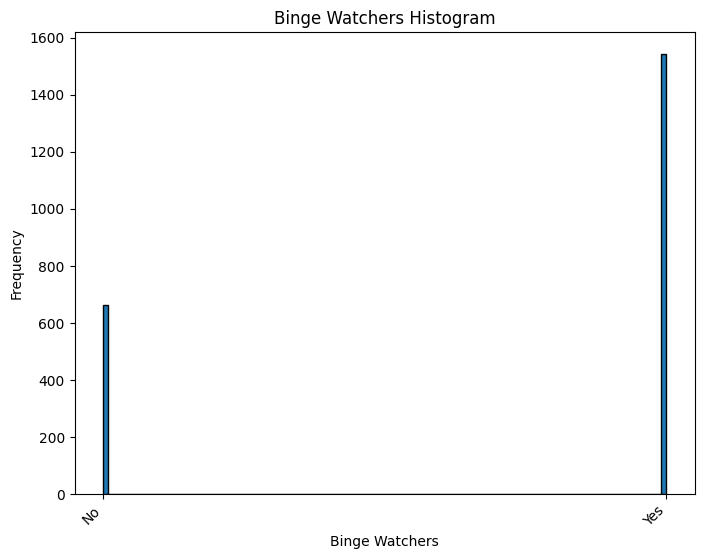

-------------------------------------
Binge Watchers ANALYSIS OF Dataset 3
-------------------------------------


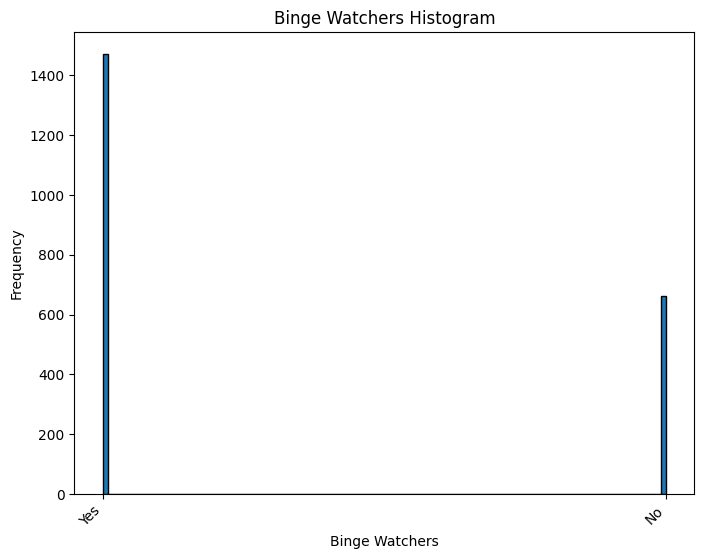

In [131]:
for df_num in range(len(dfs)):
    print("-------------------------------------")
    print("Binge Watchers ANALYSIS OF Dataset", df_num+1)
    print("-------------------------------------")
    for i in range(len(tv_cols)):
        create_histogram(dfs[df_num], tv_cols[i], x_labels_tv[i] + ' Histogram', x_labels_tv[i], 'Frequency')

### Binge Watching habits above

-------------------------------------
Streaming ANALYSIS OF Dataset 1
-------------------------------------


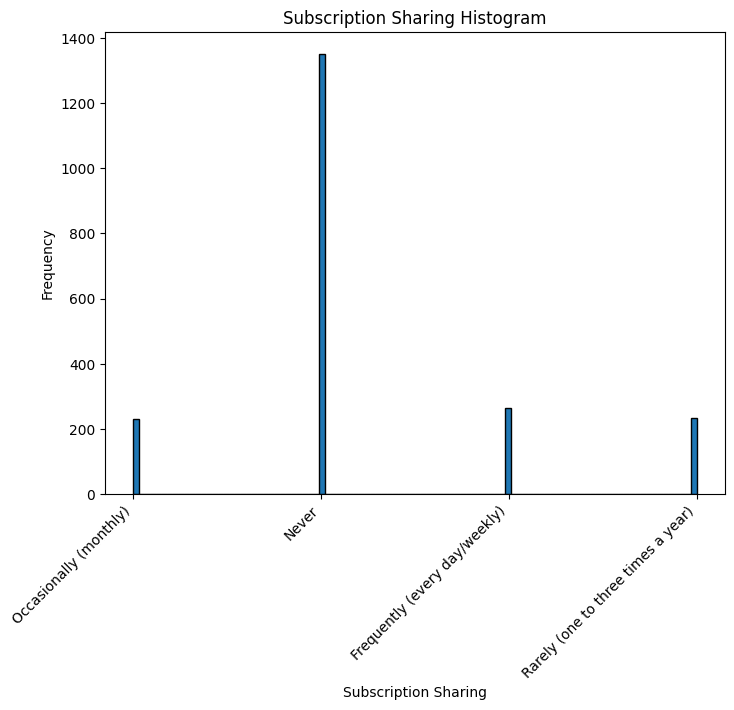

-------------------------------------
Streaming ANALYSIS OF Dataset 2
-------------------------------------
-------------------------------------
DATA IS MISSING
-------------------------------------
-------------------------------------
Streaming ANALYSIS OF Dataset 3
-------------------------------------


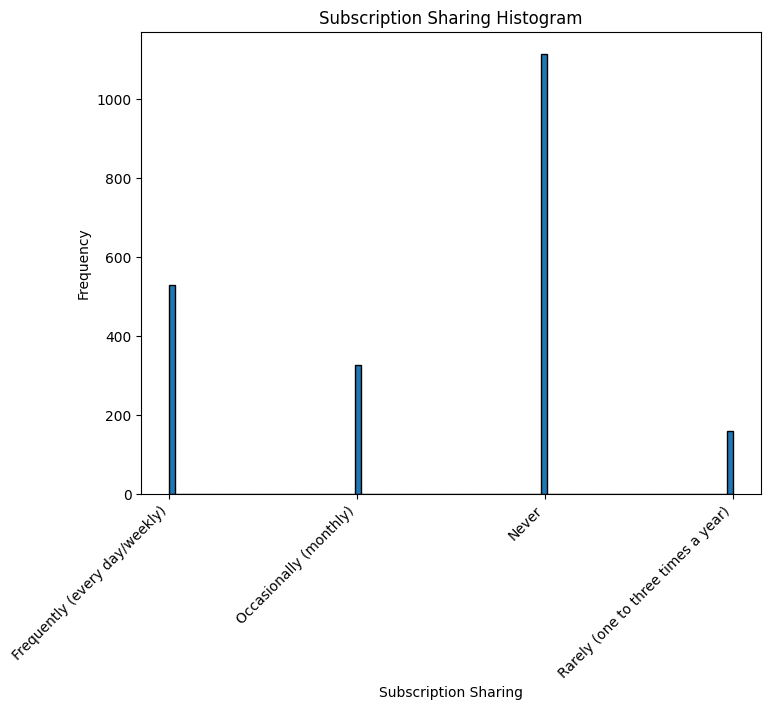

In [132]:
for df_num in range(len(dfs)):
    print("-------------------------------------")
    print("Streaming ANALYSIS OF Dataset", df_num+1)
    print("-------------------------------------")
    if df_num == 1:
        print("-------------------------------------")
        print("DATA IS MISSING")
        print("-------------------------------------")
        continue
    for i in range(len(streaming_cols)):
        create_histogram(dfs[df_num], streaming_cols[i], x_labels_streaming[i] + ' Histogram', x_labels_streaming[i], 'Frequency')

### People do not usually share subscriptions

-------------------------------------
News ANALYSIS OF Dataset 1
-------------------------------------


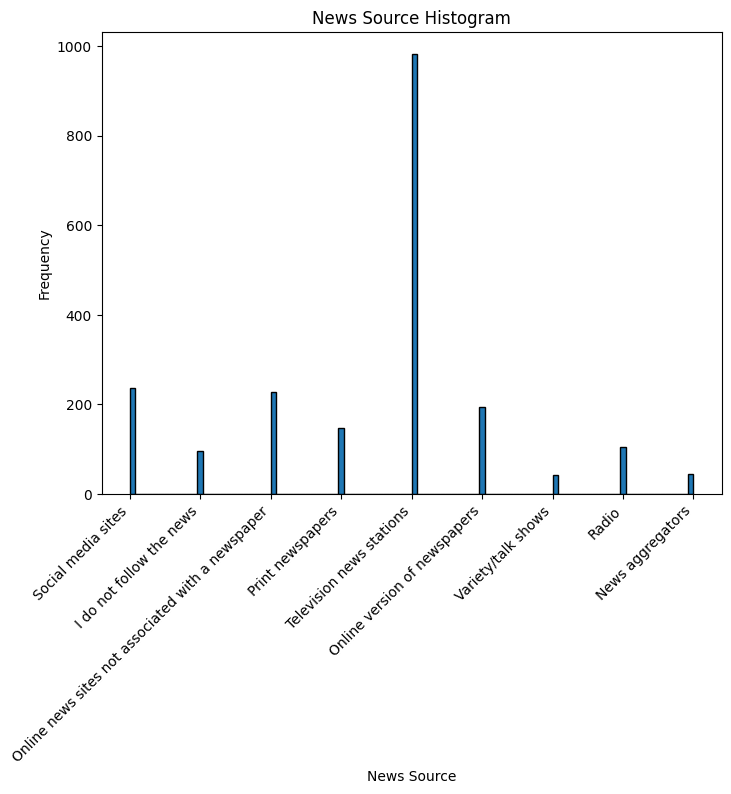

-------------------------------------
News ANALYSIS OF Dataset 2
-------------------------------------


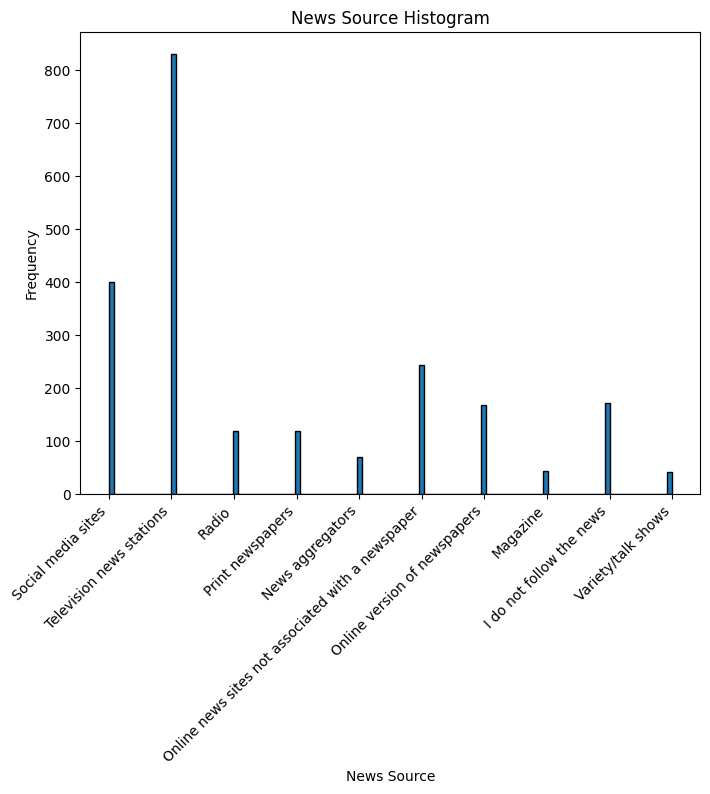

-------------------------------------
News ANALYSIS OF Dataset 3
-------------------------------------


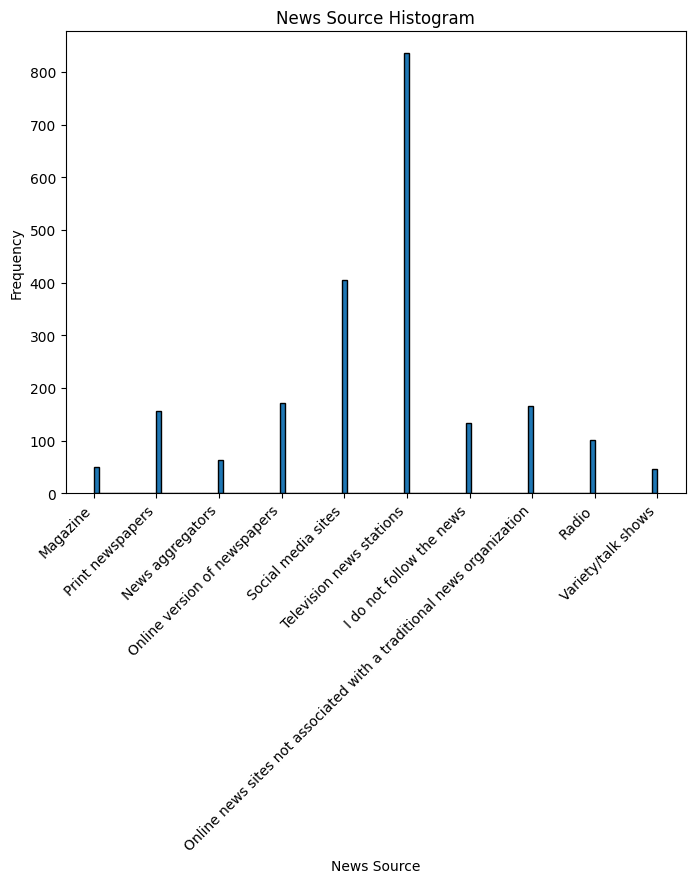

In [133]:
for df_num in range(len(dfs)):
    print("-------------------------------------")
    print("News ANALYSIS OF Dataset", df_num+1)
    print("-------------------------------------")
    for i in range(len(news_cols)):
        create_histogram(dfs[df_num], news_cols[i], x_labels_news[i] + ' Histogram', x_labels_news[i], 'Frequency')

### TV News stations are the most popular news source, social media sites have doubled for datasets 2 and 3?

# Same analysis on the combined dataset

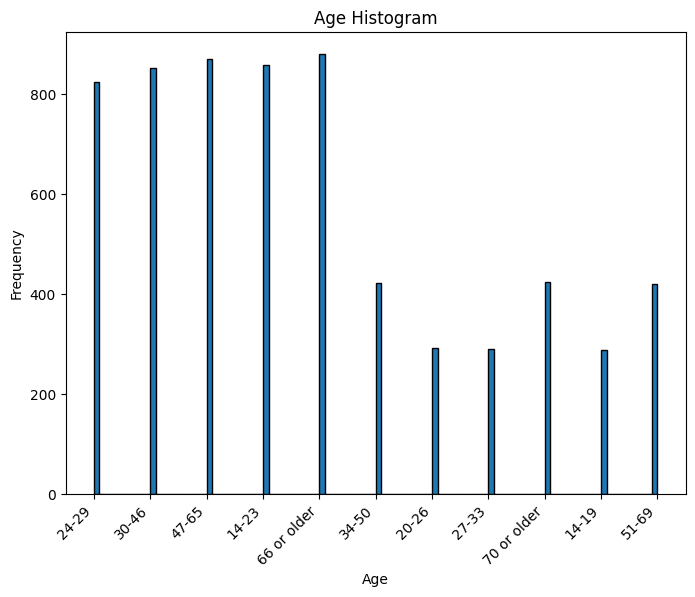

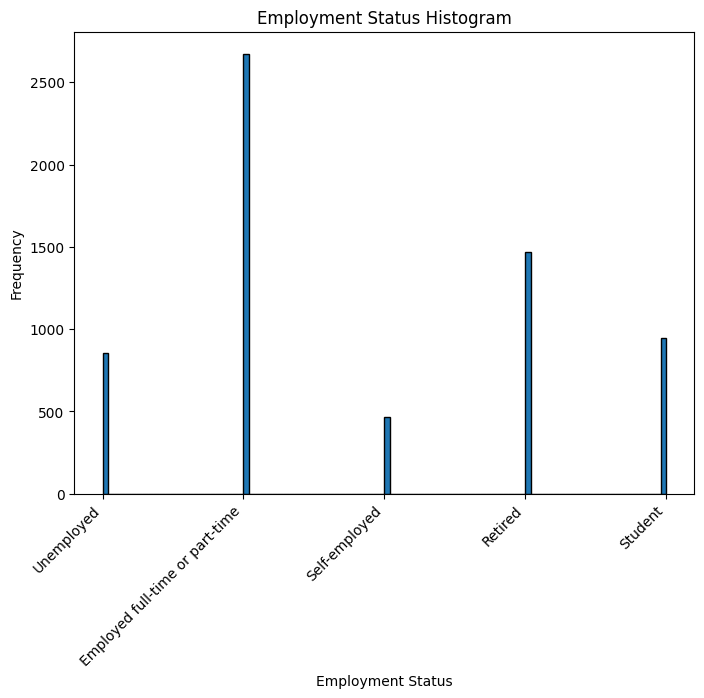

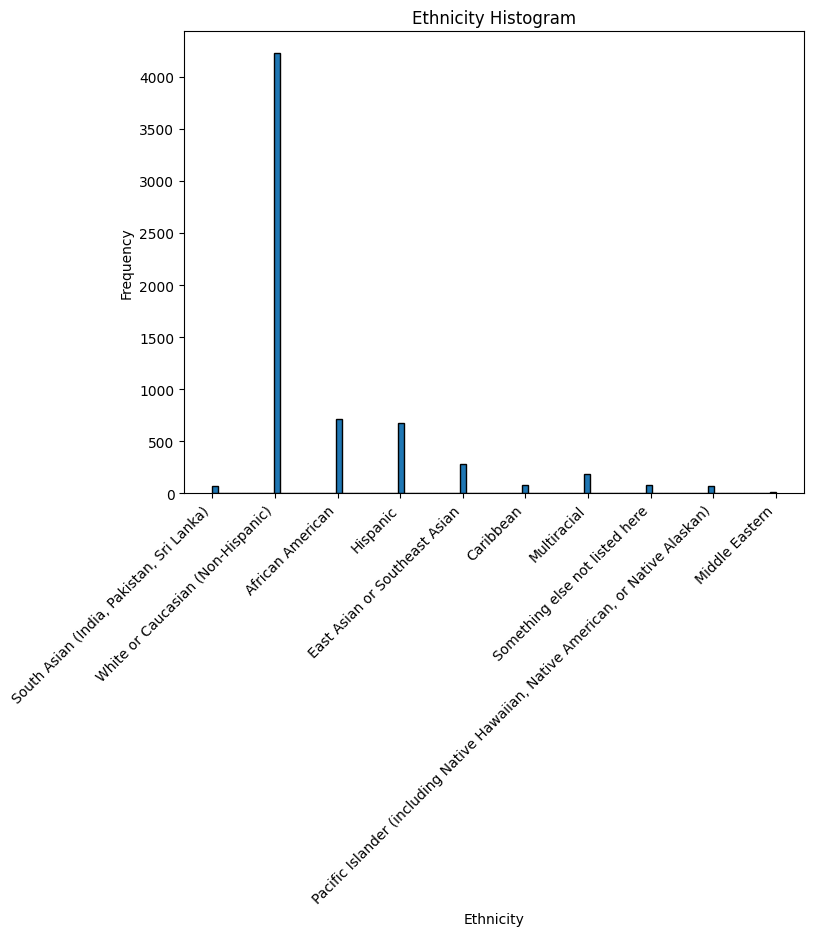

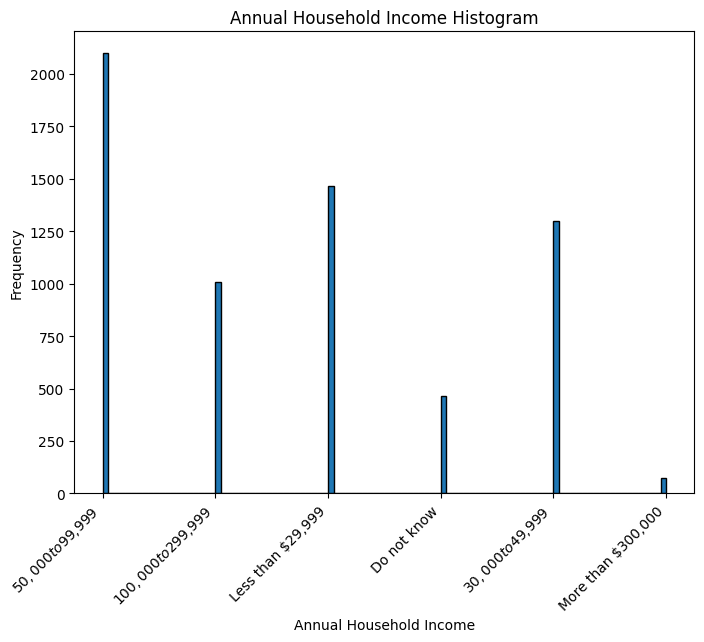

In [134]:
for i in range(len(demographics)):
        create_histogram(merged_df, demographics[i], x_labels_demographics[i] + ' Histogram', x_labels_demographics[i], 'Frequency')

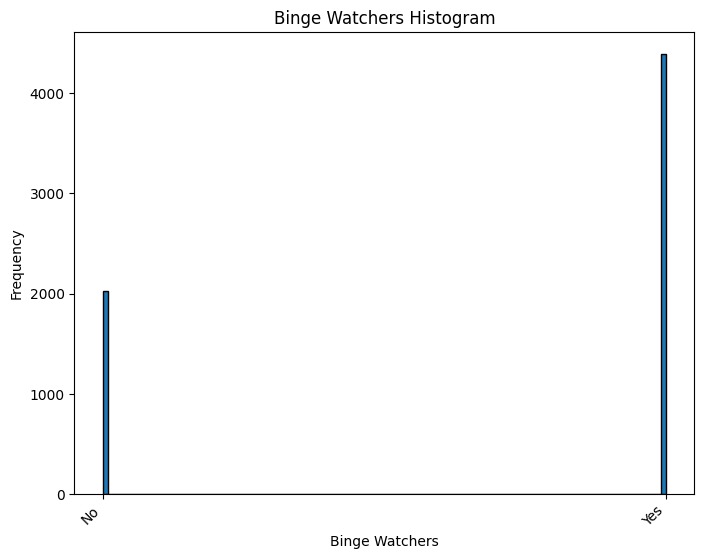

In [135]:
for i in range(len(tv_cols)):
        create_histogram(merged_df, tv_cols[i], x_labels_tv[i] + ' Histogram', x_labels_tv[i], 'Frequency')

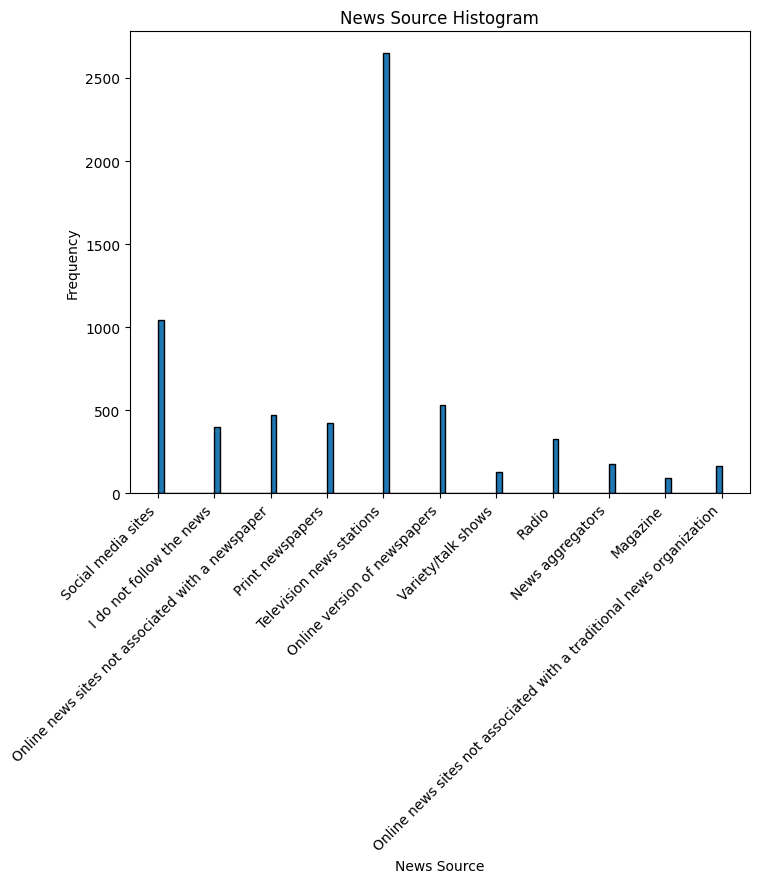

In [137]:
for i in range(len(news_cols)):
        create_histogram(merged_df, news_cols[i], x_labels_news[i] + ' Histogram', x_labels_news[i], 'Frequency')